<a href="https://colab.research.google.com/github/slxuphys/physics-demo/blob/main/angryBird.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import matplotlib.animation as animation
import urllib
from PIL import Image
# Load and prepare your custom image
#img = mpimg.imread('./red.png')

bird_image = urllib.request.urlopen('https://www.pinclipart.com/picdir/big/523-5235867_red-bird-clip-art-with-photos-medium-size.png');
bird_image = Image.open(bird_image)
pig_image  = urllib.request.urlopen('https://www.pinclipart.com/picdir/big/538-5382766_graphic-transparent-download-angry-pigs-clipart-angry-birds.png');
pig_image  = Image.open(pig_image)

class Character:
    def __init__(self, image, zoom, pos):
        self.image = OffsetImage(image, zoom=zoom)
        self.isDraw = False
        self.pos = pos
        self.ax = None
    def update_position(self, pos):
        self.pos = pos
        if self.ax!=None:
            self.draw()
    def draw(self, ax=None):
        if ax!=None:
            self.ax = ax
        if self.isDraw:
            self.annotation.remove()
          # Adjust 'zoom' as needed
        self.annotation = AnnotationBbox(self.image, self.pos, frameon=False);  # Adjust location (0.5, 0.5) as needed
        self.ax.add_artist(self.annotation)
        self.isDraw =True

bird = Character(bird_image,0.015, (0,0))
pig = Character(pig_image,0.03, (5,2))



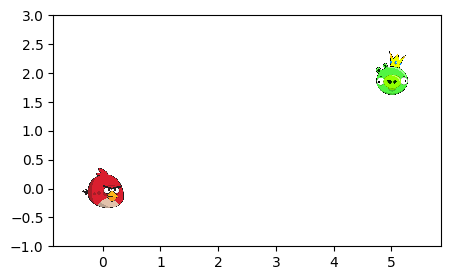

In [ ]:
# Create your plot here
plt.figure(figsize=(5,3))
fig = plt.gcf()
ax = plt.gca()
ax.autoscale()
plt.xlim(-1,6)
plt.ylim(-1,3)
ax.axis('equal')
bird.draw(ax)
pig.draw(ax)
# Place the image on the plot




In [ ]:
import numpy as np

def projectile_motion(v, angle):
    pos_x=[0]
    pos_y=[0]
    x=0
    y=0
    vx = v*np.cos(angle/180*np.pi)
    vy = v*np.sin(angle/180*np.pi)
    dt = 0.01
    while True:
        x = x + vx*dt
        vy = vy -10*dt
        y = y + vy*dt
        if x>6:
            break
        if y<0:
            break
        pos_x.append(x)
        pos_y.append(y)
    return pos_x, pos_y

def draw_frame(index):
    bird.update_position((pos_x[index], pos_y[index]))

In [ ]:
pos_x, pos_y = projectile_motion(v=8, angle=20)
print(len(pos_x))

anim = animation.FuncAnimation(fig,draw_frame,frames=len(pos_x), interval=100)

IPython.display.HTML(anim.to_jshtml())

54
